# 📺 View channels

In [ ]:
#| default_exp repr_chans

In [ ]:
# |hide
from nbdev.showdoc import *

In [ ]:
# |hide
# |export
import numpy as np
from lovely_numpy import lovely

from lovely_numpy.repr_rgb import rgb
from lovely_numpy.utils.colormap import InfCmap, get_cmap

In [ ]:
# |export

def chans(  t: np.ndarray,      # Input tensor 
            cmap = "coolwarm",  # Use matplotlib colormap by this name
            cm_below="blue", cm_above="red",
            cm_ninf="cyan", cm_pinf="fuchsia",
            cm_nan="yellow",
            gutter_px=3,   # Draw write gutters when tiling the images
            frame_px=1,    # Draw black frame around each image
            scale=1,       # Stretch the image. Only itegers please.
            view_width=966):    
    """
    Process individual channels of a tensor that can be interpreted as as image
    `x` and `y` specify which dimensions should be used as spatial ones.
    """
    
    assert t.ndim >= 2, f"Expected a 2 or 3-dim input, got {t.shape}={t.ndim}"
    if t.ndim == 2: t = t[None]
    
    ### XXX Do we want a way to pass a custom cmap instead of mpl one?
    inf_cmap = InfCmap(cmap=get_cmap(cmap),
                  below=cm_below, above=cm_above,
                  nan=cm_nan, ninf=cm_ninf, pinf=cm_pinf)

    return rgb(inf_cmap(t), cl=True, gutter_px=gutter_px, frame_px=frame_px, scale=scale, view_width=view_width)


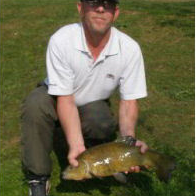

In [ ]:
in_stats = ( (0.485, 0.456, 0.406), (0.229, 0.224, 0.225) )

image = np.load("mysteryman.npy")
image = (image * np.array(in_stats[1])[:,None,None])
image += np.array(in_stats[0])[:,None,None]

rgb(image, cl=0)

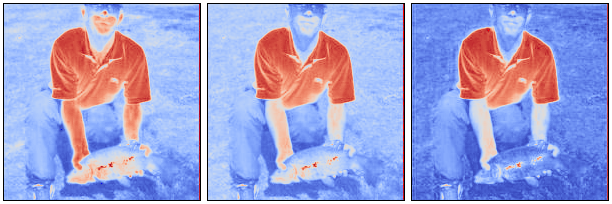

In [ ]:
chans(image)

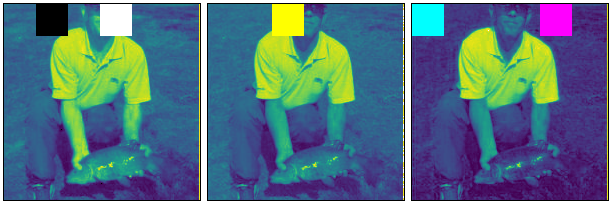

In [ ]:
# In R
image[0,0:32,32:64] = -0.1 # Below min
image[0,0:32,96:128] = 1.1 # Above max
# In G
image[1,0:32,64:96] = float("nan")
# In B
image[2,0:32,0:32] = float("-inf")
image[2,0:32,128:128+32] = float("+inf")

chans(image, cmap="viridis", cm_below="black", cm_above="white")

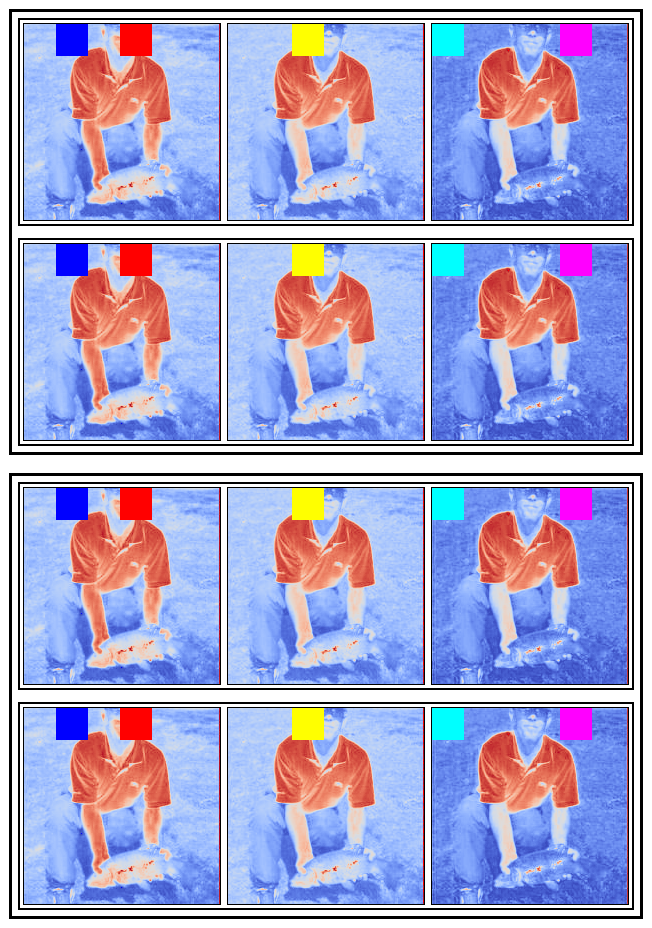

In [ ]:
# 4 images, stacked 2x2
chans(np.stack([image]*4).reshape((2,2,3,196,196)))

In [ ]:
# |hide
import nbdev; nbdev.nbdev_export()